In [1]:
suppressMessages(library(ggplot2))
suppressMessages(library(ArchR))
suppressMessages(library(Seurat))
suppressMessages(library(Signac))
suppressMessages(library(purrr))
suppressMessages(library(readr))
suppressMessages(library(patchwork))
suppressMessages(library(BSgenome.Hsapiens.UCSC.hg38))
suppressMessages(library(dplyr))
suppressMessages(library(cowplot))
suppressMessages(library(ggrepel))
suppressMessages(library(rhdf5))
suppressMessages(library(chromVARmotifs))

In [2]:
set.seed(42)
addArchRThreads(threads = 64)

Setting default number of Parallel threads to 64.



In [3]:
proj <- loadArchRProject("./ArchRProject_Fibro", showLogo = FALSE)

Successfully loaded ArchRProject!



In [4]:
proj <- addImputeWeights(proj)

ArchR logging to : ArchRLogs/ArchR-addImputeWeights-d1d403186e9af-Date-2025-05-06_Time-13-38-55.600543.log
If there is an issue, please report to github with logFile!

2025-05-06 13:38:55.815209 : Computing Impute Weights Using Magic (Cell 2018), 0 mins elapsed.

Filtering 1 dims correlated > 0.75 to log10(depth + 1)

Warning message in sprintf("Completed Getting Magic Weights!", round(object.size(weightList)/10^9, :
“one argument not used by format 'Completed Getting Magic Weights!'”


In [7]:
proj <- addHarmony(
    ArchRProj = proj,
    reducedDims = "IterativeLSI",
    name = "Harmony_Fibro",
    groupBy = "Sample",
    force = TRUE
)

Filtering 1 dims correlated > 0.75 to log10(depth + 1)

Warning message in (function (...) :
“HarmonyMatrix is deprecated and will be removed in the future from the API in the future”
Warning message:
“Warning: The parameters do_pca and npcs are deprecated. They will be ignored for this function call and please remove parameters do_pca and npcs and pass to harmony cell_embeddings directly.
This warning is displayed once per session.”
Transposing data matrix

Initializing state using k-means centroids initialization

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony converged after 3 iterations



In [8]:
proj <- addUMAP(
    ArchRProj = proj,
    reducedDims = "Harmony_Fibro",
    name = "UMAP_Fibro",
    nNeighbors = 45,   # 默认是 15，可以尝试 30 或更大
    minDist = 0.05,     # 默认是 0.1，可以尝试 0.05 或更小
    metric = "cosine",  # 可以尝试不同的距离度量，如 "euclidean", "manhattan"
    force = TRUE
)

13:41:12 UMAP embedding parameters a = 1.75 b = 0.8421

13:41:12 Read 11228 rows and found 29 numeric columns

13:41:12 Using Annoy for neighbor search, n_neighbors = 45

13:41:12 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

13:41:13 Writing NN index file to temp file /tmp/RtmpoEUVWg/filed1d40ca97a43

13:41:13 Searching Annoy index using 48 threads, search_k = 4500

13:41:13 Annoy recall = 100%

13:41:14 Commencing smooth kNN distance calibration using 48 threads
 with target n_neighbors = 45

13:41:15 Initializing from normalized Laplacian + noise (using RSpectra)

13:41:15 Commencing optimization for 200 epochs, with 798096 positive edges

13:41:15 Using rng type: pcg

13:41:25 Optimization finished

13:41:25 Creating temp model dir /tmp/RtmpoEUVWg/dird1d401a7a381

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-d1d4024903066-Date-2025-05-06_Time-13-41-26.843355.log
If there is an issue, please report to github with logFile!



Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-d1d4024903066-Date-2025-05-06_Time-13-41-26.843355.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-d1d4040928caf-Date-2025-05-06_Time-13-41-27.192758.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-d1d4040928caf-Date-2025-05-06_Time-13-41-27.192758.log



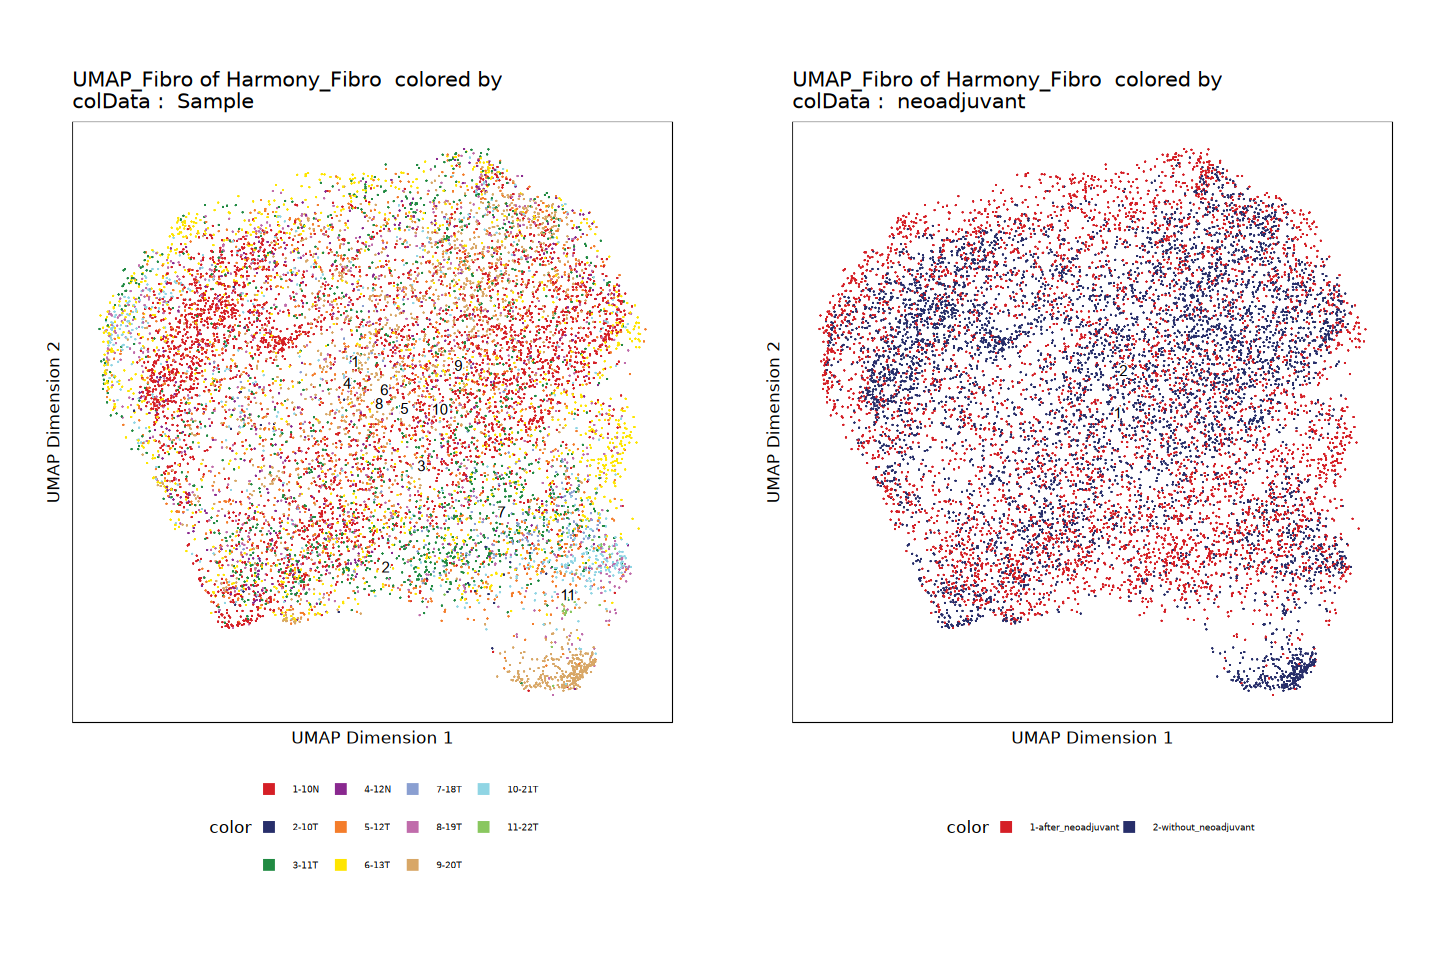

In [9]:
options(repr.plot.height = 8, repr.plot.width = 12)
p1 <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "cellColData", 
    name = "Sample", 
    embedding = "UMAP_Fibro"
    )
p2 <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "cellColData", 
    name = "neoadjuvant", 
    embedding = "UMAP_Fibro"
    )
ggAlignPlots(p1, p2, type = "h")

In [10]:
proj <- addClusters(proj, name = "clusters_Fibro", resolution = 1.0, force = TRUE)

ArchR logging to : ArchRLogs/ArchR-addClusters-d1d4058b15144-Date-2025-05-06_Time-13-42-20.1475.log
If there is an issue, please report to github with logFile!

Filtering 1 dims correlated > 0.75 to log10(depth + 1)

2025-05-06 13:42:20.381384 : Running Seurats FindClusters (Stuart et al. Cell 2019), 0.003 mins elapsed.

Warning message:
“Data is of class matrix. Coercing to dgCMatrix.”
Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 11228
Number of edges: 405779

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7842
Number of communities: 12
Elapsed time: 1 seconds


2025-05-06 13:42:32.518113 : Testing Outlier Clusters, 0.205 mins elapsed.

2025-05-06 13:42:32.52323 : Assigning Cluster Names to 12 Clusters, 0.205 mins elapsed.

2025-05-06 13:42:32.716285 : Finished addClusters, 0.208 mins elapsed.



ArchR logging to : ArchRLogs/ArchR-plotEmbedding-d1d402d1bd257-Date-2025-05-06_Time-13-43-21.233162.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-d1d402d1bd257-Date-2025-05-06_Time-13-43-21.233162.log



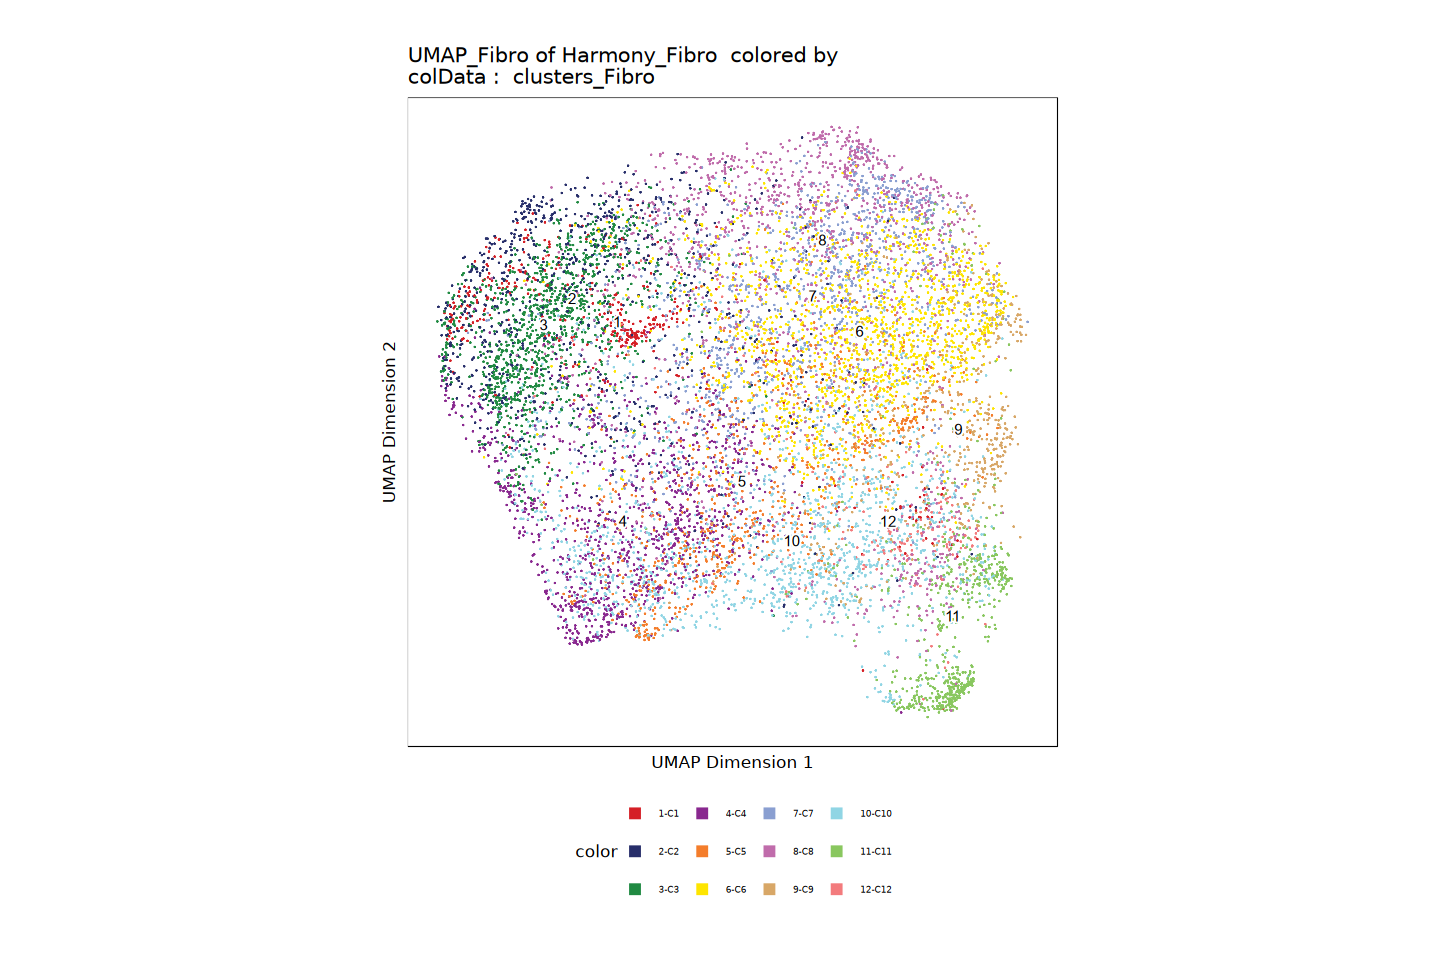

In [11]:
p1 <- plotEmbedding(
    ArchRProj = proj, 
    colorBy = "cellColData", 
    name = "clusters_Fibro", 
    embedding = "UMAP_Fibro"
    )
p1